## 高频单词的聚类与分类
        本项目根据英语语料库获取了英语语言当中部分高频且具有实际意义的英语单词，并根据这些单词的特征信息，通过计算比较单词与单词之间的余弦相似度，对单词进行分类或聚类的操作。最终使用测试数据集合进行验证。

0. 导入相应的包

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
import pandas as pd

1. 数据读取

   文件详情:
   
        word1.csv 中包含44个高频的英语单词
        feat_mcrae.csv 中显示了特征信息的列表
        matrix1 bnc.csv  44×2497 和matrix1_mcrae.csv 44×2526的矩阵分别对了上述文件中的特征信息,
        给出了具体的数值,以表示每个单词对于这个特性的相关程度。
        其中BNC是来自英语国家语料库的数据,根据文章内容的单词出现频率计算得出 (context window of ± 5 words. )
        McRae是通过通过调查普通人对单词的认识和判断得到的数据

In [2]:
pd.set_option('display.max_columns', 12) #设置pandas的显示列数
#读取数据
words1 = pd.read_csv("./words1.csv", index_col=0).values.flatten() 
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix1_mcrae = pd.read_csv("./matrix1_mcrae.csv", index_col=0).values
matrix1_bnc = pd.read_csv("./matrix1_bnc.csv", index_col=0).values

In [3]:
#测试读取是否成功
print(words1)
print(feats_mcrae)
print(matrix1_mcrae)
print(matrix1_bnc)

['banana' 'boat' 'bottle' 'bowl' 'car' 'cat' 'cherry' 'chicken' 'chisel'
 'corn' 'cow' 'cup' 'dog' 'duck' 'eagle' 'elephant' 'hammer' 'helicopter'
 'kettle' 'knife' 'lettuce' 'lion' 'motorcycle' 'mushroom' 'onion' 'owl'
 'peacock' 'pear' 'pen' 'pencil' 'penguin' 'pig' 'pineapple' 'potato'
 'rocket' 'scissors' 'screwdriver' 'ship' 'snail' 'spoon' 'swan'
 'telephone' 'truck' 'turtle']
['a_baby_bird' 'a_baby_cow' 'a_baby_deer' ... 'worn_with_suits'
 'worn_with_suspenders' 'worn_with_ties']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  3   4   9 ...   0   0   0]
 [ 95  68  50 ...   0   0   0]
 [ 49  35  70 ...   0   0   0]
 ...
 [130  57  62 ...   0   0   0]
 [ 13  10   8 ...   0   0   0]
 [  3   5   5 ...   0   0   0]]


2. 对数据进行聚类操作
    
        对bnc单词特征数据使用**层次聚类**的算法
        参考scipy文档,使用scipy库中的cluster的linkage方法,通过改变参数实现三种不同的层次聚类
        https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy 对三种不同方式的结果进行对比.

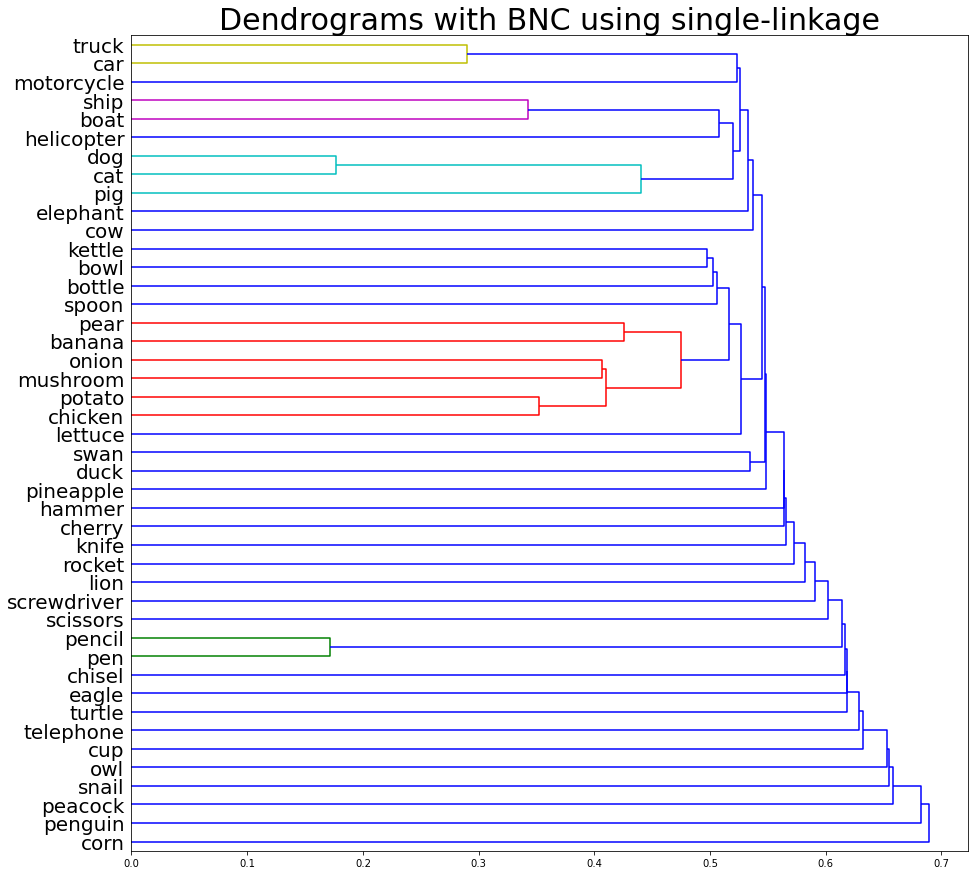

In [4]:
#single-linkage
TreeSingleBNC = linkage(matrix1_bnc,'single','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using single-linkage",fontsize=30)
dendrogram(TreeSingleBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

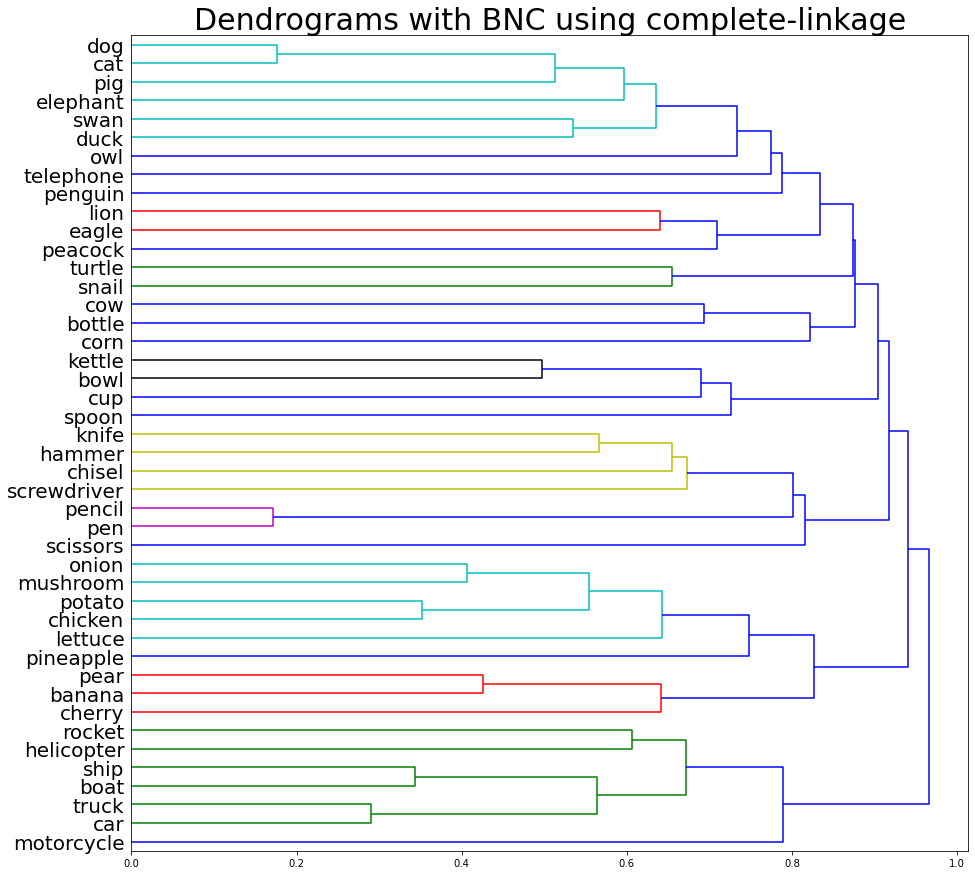

In [5]:
#Complete linkage 
TreeCompleteBNC = linkage(matrix1_bnc,'complete','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using complete-linkage",fontsize=30)
dendrogram(TreeCompleteBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

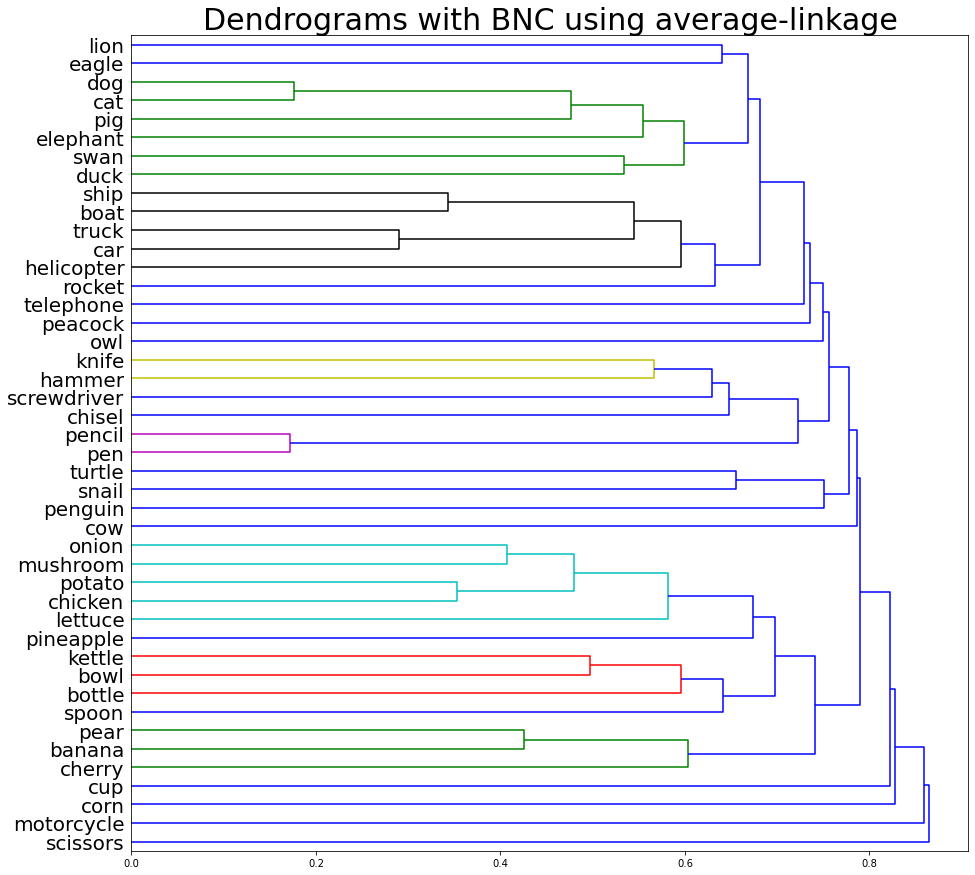

In [6]:
#Average-linkage
TreeAverageBNC = linkage(matrix1_bnc,'average','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with BNC using average-linkage",fontsize=30)
dendrogram(TreeAverageBNC, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

我们拿单词corn举例:

    Simple-linkage方法 corn在最后一步,和上述其余所有合并的单词的集合进行合并
    Complete-linkage方法 corn在和{cow,bottle}的集合进行合并
    Average-linkage方法 corn在倒数第三步与除了motorcycle和scissors外的单词的集合合并
    
分析:

    产生这样差异的原因是计算的方法:
    
    在Simple-linkage中,算法分别在两个不同的簇中选择两个最近,也就是相似度最高的单词直接的进行合并,所以corn在simple-linkage方法中在最后一步,是由于在数据集中没有和corn较为相似的单词.也就是说,corn与其他单词的特征差异比任何其余两个单词之间的差异都要高.
    
    在Complete-linkage中,算法首先计算最远距离的单词对分为两个簇,并选择当中的最短距离.也就是说corn和bottle有很大的差异,但其余簇与corn的差异相比而言还要更大.
    
    在Average-linkage中算法计算平均的距离来进行分类。
    
总的来说:

    Single-linkage 聚类法
        类间距离等于两类对象之间的最小距离。
    Complete-linkage 聚类法
        组间距离等于两组对象之间的最大距离。
    Average-linkage 聚类法
          组间距离等于两组对象之间的平均距离。
结论:
    
    使用不同的linkage方法会得到不同的聚类结果


3. 与此同时,对mcrae单词特征数据使用上述层次聚类的算法,对比对两个不同特征集的结果异同

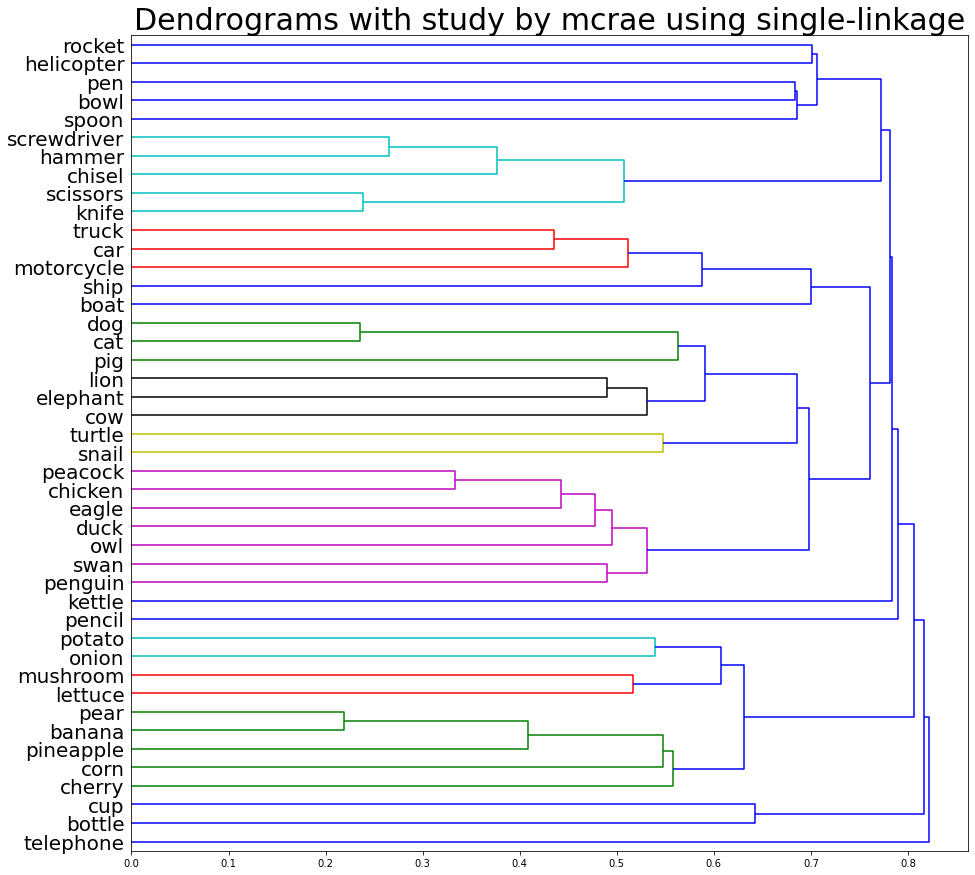

In [7]:
TreeSingleMR = linkage(matrix1_mcrae,'single','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using single-linkage",fontsize=30)
dendrogram(TreeSingleMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

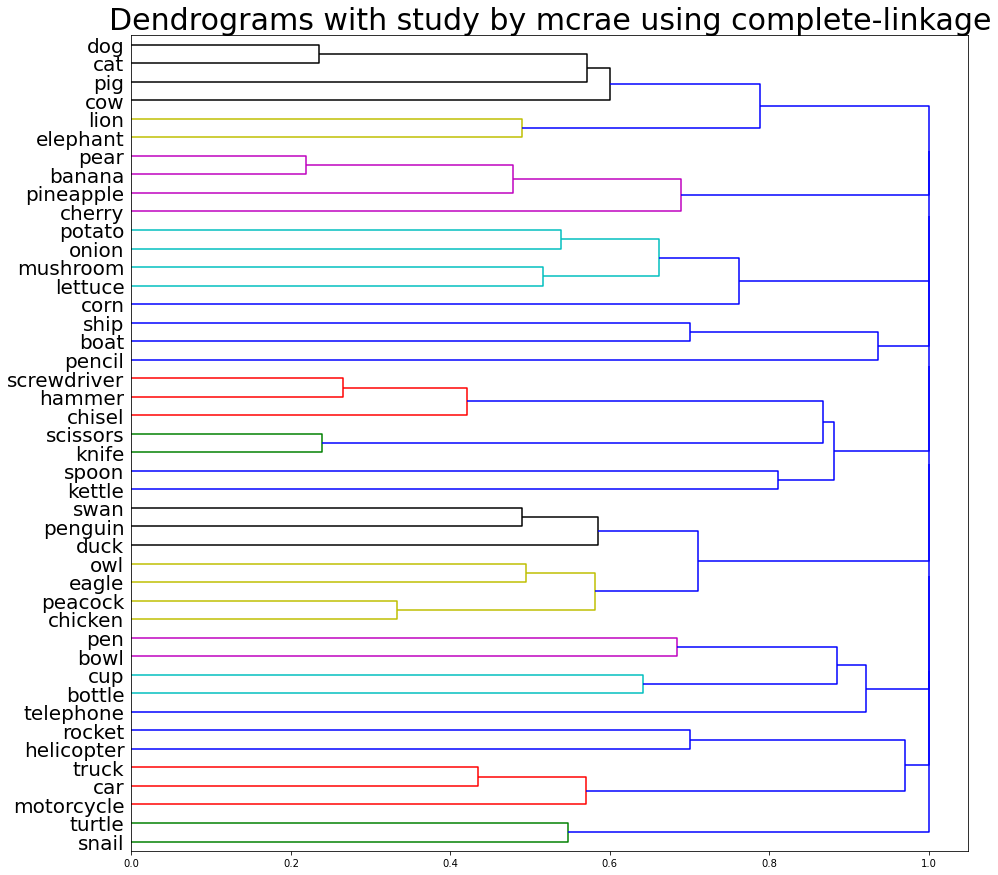

In [8]:
TreeCompleteMR = linkage(matrix1_mcrae,'complete','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using complete-linkage",fontsize=30)
dendrogram(TreeCompleteMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

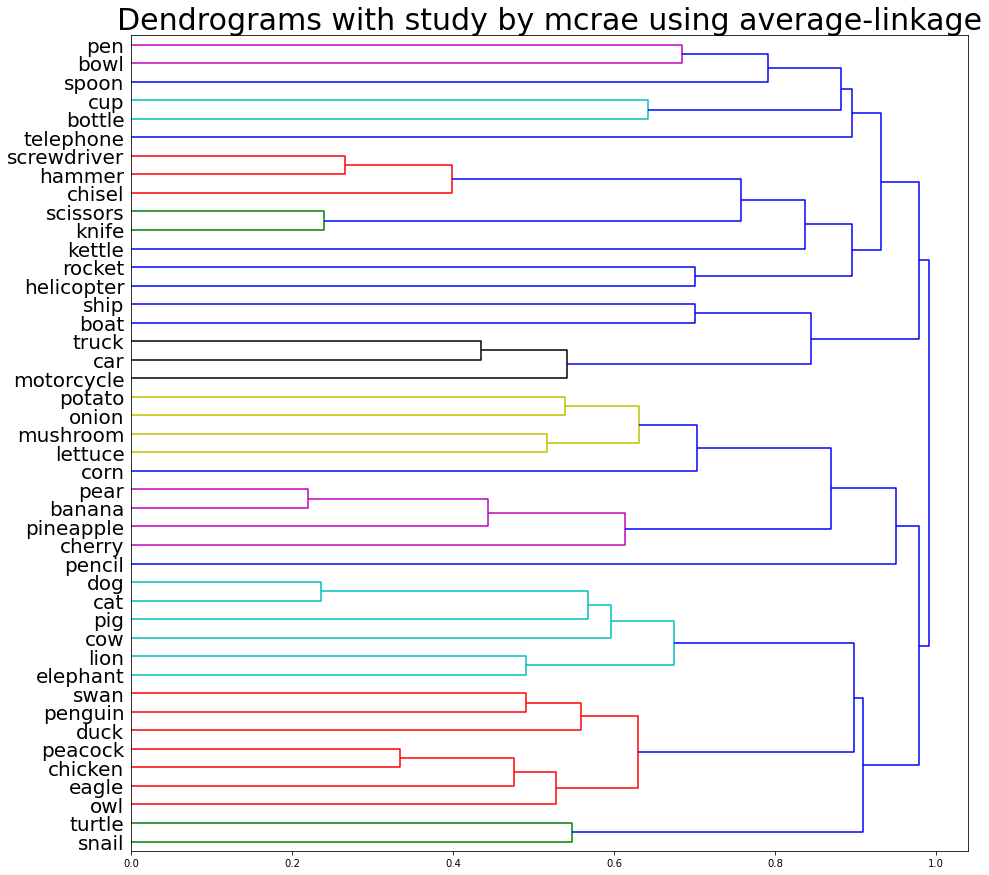

In [9]:
TreeAverageMR = linkage(matrix1_mcrae,'average','cosine')
fig = plt.figure(figsize=(15,15))
plt.title("Dendrograms with study by mcrae using average-linkage",fontsize=30)
dendrogram(TreeAverageMR, labels=words1, orientation= 'right',leaf_font_size=20);
fig.show()

    我们可以观察到，对于数据集matrix1 bnc.csv 和matrix1_mcrae.csv 来说，层次分类后的结果的矩阵有所相似却也有所不一致。

    我们拿两个数据集在Single-linkage 聚类法下得到的结果为例进行简单分析：

现象：

    在matrix1 bnc.csv 和matrix1_mcrae.csv 的分析结果中，单词cat和dog、ship和boat都被认定为较为相似。
    而原本在matrix1 bnc.csv 分析中被判断为与其他单词都不那么相似的corn被放在了matrix1_mcrae.csv 分析中的第三步。

分析：

    其中BNC是来自英语国家语料库的数据,根据文章内容的单词出现频率计算得出，  McRae是通过调查普通人对单词的认识和判断得到的数据。
    而对于机器学习的过程来说，计算机不太会去探究单词与特征内容的关系，往往只是当关联出现时记录下来；
    而对于人类来说，判断关联相似的过程往往是根据原有的认识。比如对于单词corn来说，机器学习过程中它与其他单词关联的内容比较少或者没有，而对于人类来说，corn谷物可以通过食物可以和水果等联系在一起。因此聚类结果具有差异。

结论：

    对于机器学习和人类识别两个不同过程下得出的结论会有所不同,下面我们更详细地讨论聚类结果不同的原因.


4. 详细比较聚类结果

    我们拿单词chicken举例子,在用matrix_bnc特征数据进行聚类时,chiken和potato,mashroom,onion进行聚类.
    根据BNC的数据来看,chicken单词被认为是食物,可以联想为炸鸡等食物
    但我们知道chicken这个单词还有一个较为常用的,生物意义上的概念
    因此我们计算了具体的chicken和peacock的相似度,以及chicken和potato的相似度(比较 chicken与孔雀和土豆的相似度)
    
    1. Chicken 和 Peacock 的相似度 Cosine:0.2320178214444637
    2. Chicken 和 Potato 的相似度 Cosine:0.6475171259000461
    
    我们发现Chicken与Potato的相似度明显大于Peacock的相似度,因此我们会把chicken分在食物的类别.

In [12]:
def cosVector(x,y):
    if(len(x)!=len(y)):
        print('error input,x and y is not in the same space')
        return;
    result1=0.0;
    result2=0.0;
    result3=0.0;
    for i in range(len(x)):
        result1+=x[i]*y[i]   #sum(X*Y)
        result2+=x[i]**2     #sum(X*X)
        result3+=y[i]**2     #sum(Y*Y)
    print("result is "+str(result1/((result2*result3)**0.5))) #show the results

print("1. Chicken 和 Peacock 的相似度 Cosine:")
cosVector(matrix1_bnc[7],matrix1_bnc[26])                  #7 is chicken, 26 is peacock
print("2. Chicken 和 Potato 的相似度 Cosine:")
cosVector(matrix1_bnc[7],matrix1_bnc[33])                  #33 is potato

1. Chicken 和 Peacock 的相似度 Cosine:
result is 0.2320178214444637
2. Chicken 和 Potato 的相似度 Cosine:
result is 0.6475171259000461


另外我们详细的查看chicken的McRae特征矩阵,具体的特征值的数据.

a_bird is 14 , 
an_animal is 11 , 
beh_-_cannot_fly is 9 , 
beh_-_eats is 7 , 
beh_-_flies is 5 , 
beh_-_lays_eggs is 25 , 
eaten_by_frying is 5 , 
has_a_beak is 8 , 
has_feathers is 21 , 
has_legs is 5 , 
has_wings is 9 , 
is_domestic is 6 , 
is_edible is 12 , 
is_loud is 5 , 
is_stupid is 5 , 
lives_on_farms is 11 , 

我们发现McRae中Chicken更倾向于被认为是一种动物,我们再次计算chicken和peacock和potato的相似度

1. Chicken 和 Peacock 的相似度 Cosine:0.6662704441820472
2. Chicken 和 Potato 的相似度 Cosine:0.48523373381591295

我们可以发现和Peacock的相似度更大,所以在McRae中Chicken更倾向于被分类为动物.

这也恰好说明了为什么数据特征集合来源不同,得到的结果也不同.

In [11]:
i=0
while (i<2526):
    if(matrix1_mcrae[7][i]!=0):
        print(feats_mcrae[i],"is",matrix1_mcrae[7][i],", ")
    i=i+1
    
print("----------------------------------------------------------------------------------")
print("1. Chicken 和 Peacock 的相似度 Cosine:")
cosVector(matrix1_mcrae[7],matrix1_mcrae[26])                  #7 is chicken, 26 is peacock
print("2. Chicken 和 Potato 的相似度 Cosine:")
cosVector(matrix1_mcrae[7],matrix1_mcrae[33])                  #33 is potato

a_bird is 14 , 
an_animal is 11 , 
beh_-_cannot_fly is 9 , 
beh_-_eats is 7 , 
beh_-_flies is 5 , 
beh_-_lays_eggs is 25 , 
eaten_by_frying is 5 , 
has_a_beak is 8 , 
has_feathers is 21 , 
has_legs is 5 , 
has_wings is 9 , 
is_domestic is 6 , 
is_edible is 12 , 
is_loud is 5 , 
is_stupid is 5 , 
lives_on_farms is 11 , 
----------------------------------------------------------------------------------
1. For cosine between chicken and peacock:
result is 0.6662704441820472
2. For cosine between chicken and potato:
result is 0.048523373381591295


5. 使用测试集合单词进行分类测试

    最后,我们将这些单词人为地分为几个类,并输入单词进行分类操作,观察学习过后得到的分类结果与实际意义上的分类结果的差异.
    
    具体地,我们分为natural和artifact
    其中,natural分为animal和vegetable
    animal分为bird和groundAnimal
    vegetable分为fruitTree和green
    artifact分为tool和vehicle
    为了方便起见,我们认为规定cluster的最大数量为6 
    也就是:
    
    groundAnimal-animal-natural
    bird-animal-natural
    
    green-vegetable-natural
    fruitTree-vegetable-natural,
    
    tool-artifact-artifact,
    vehicle-artifact-artifact

In [18]:
#人为分类的数据
human_classification_names = pd.read_csv("./categories.txt", index_col=0)
print(human_classification_names)

           NOUN                        CLASS
0        banana  fruitTree-vegetable-natural
1        cherry  fruitTree-vegetable-natural
2          pear  fruitTree-vegetable-natural
3     pineapple  fruitTree-vegetable-natural
4        bottle       tool-artifact-artifact
5          bowl       tool-artifact-artifact
6        chisel       tool-artifact-artifact
7           cup       tool-artifact-artifact
8        hammer       tool-artifact-artifact
9        kettle       tool-artifact-artifact
10        knife       tool-artifact-artifact
11       pencil       tool-artifact-artifact
12          pen       tool-artifact-artifact
13     scissors       tool-artifact-artifact
14  screwdriver       tool-artifact-artifact
15        spoon       tool-artifact-artifact
16    telephone       tool-artifact-artifact
17         boat    vehicle-artifact-artifact
18   motorcycle    vehicle-artifact-artifact
19          car    vehicle-artifact-artifact
20   helicopter    vehicle-artifact-artifact
21       r

In [19]:
# 重新根据上述特征和算法,按照K=6进行计算

AverageBNC_clust = fcluster(TreeAverageBNC,t=6, criterion= 'maxclust')
CompleteBNC_clust = fcluster(TreeCompleteBNC,t=6, criterion= 'maxclust')
SingleBNC_clust = fcluster(TreeSingleBNC,t=6, criterion= 'maxclust')

AverageMR_clust = fcluster(TreeAverageMR,t=6, criterion= 'maxclust')
CompleteMR_clust = fcluster(TreeCompleteMR,t=6, criterion= 'maxclust')
SingleMR_clust = fcluster(TreeSingleMR,t=6, criterion= 'maxclust')

def print_clusters(words_vector, cluster_indices):
    for category_index in range(1,7):
        for index, category in enumerate(cluster_indices):
            if category == category_index:
                print(words_vector[index])
        print("************")
    print('----------------------------')
    
print('Average/McRae:\n')
print_clusters(words1, AverageMR_clust)
print('Single/McRae\n:')
print_clusters(words1, SingleMR_clust)
print('Complete/McRae:\n')
print_clusters(words1, CompleteMR_clust)
print('Complete/BNC:\n')
print_clusters(words1, CompleteBNC_clust)
print('Single/BNC:\n')
print_clusters(words1, SingleBNC_clust)
print('Average/BNC:\n')
print_clusters(words1, AverageBNC_clust)

Average/McRae:

cat
chicken
cow
dog
duck
eagle
elephant
lion
owl
peacock
penguin
pig
snail
swan
turtle
************
banana
cherry
corn
lettuce
mushroom
onion
pear
pineapple
potato
************
pencil
************
boat
car
motorcycle
ship
truck
************
chisel
hammer
helicopter
kettle
knife
rocket
scissors
screwdriver
************
bottle
bowl
cup
pen
spoon
telephone
************
----------------------------
Single/McRae
:
bottle
cup
************
banana
cherry
corn
lettuce
mushroom
onion
pear
pineapple
potato
************
boat
bowl
car
cat
chicken
chisel
cow
dog
duck
eagle
elephant
hammer
helicopter
knife
lion
motorcycle
owl
peacock
pen
penguin
pig
rocket
scissors
screwdriver
ship
snail
spoon
swan
truck
turtle
************
kettle
************
pencil
************
telephone
************
----------------------------
Complete/McRae:

banana
boat
bottle
bowl
car
cat
cherry
chicken
chisel
corn
cow
cup
dog
duck
eagle
elephant
hammer
helicopter
kettle
knife
lettuce
lion
motorcycle
mushroom
o

    根据观察比较各种不同算法的结果,显然我们发现
    BNC 数据下通过complete linkage 算法的分类结果更符合期望的分类结果
    除了Complete bnc and Average mcrae以外,其余的分类都没有很好地分为6个类(未分类或者单独一类)
    而Complete bnc 与 Average mcrae 相比具体分类的内容来看,Complete bnc更符合我们先前设定的预期结果
    groundAnimal-animal-natural
    bird-animal-natural 
    green-vegetable-natural
    fruitTree-vegetable-natural,
    tool-artifact-artifact,
    vehicle-artifact-artifact
    因此我们采用Complete Bnc

读入另外一组单词特征数据,来对我们的分类进行测试

In [20]:
words2 = pd.read_csv("./words2.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix2_mcrae = pd.read_csv("./matrix2_mcrae.csv", index_col=0).values
matrix2_bnc = pd.read_csv("./matrix2_bnc.csv", index_col=0).values
category_names = pd.read_csv("./categorynames.csv", index_col=0).values.flatten()
category_indices = pd.read_csv("./categoryindices.csv", index_col=0).values.flatten()

In [23]:
# 计算余弦相似度的函数
from scipy.spatial import distance
def cosine_sim(M1,M2):
    score = 1 - distance.cosine(M1, M2)
    return score

In [24]:
# 基于原来分类模型进行分类
def exemplar_model(exemplar_matrix, target_matrix, category_indices = category_indices):
    predictedCatIndices = []
    examplarIndices = []
    for word in target_matrix:
        highest_cos = 0
        indice = 0
        i=0
        for example in exemplar_matrix:
            #计算新的单词向量的余弦相似度
            cosine_computation = cosine_sim(word, example)
            if(cosine_computation > highest_cos):
                indice = i
                # 找到原来相似度最高的单词
                highest_cos = cosine_computation
            i=i+1
        #赋予单词最匹配的类别
        examplarIndices.append(indice)
        predictedCatIndices.append(category_indices[indice])
    return predictedCatIndices, examplarIndices

In [25]:
predictedCatIndicesMR, examplarIndicesMR = exemplar_model(matrix1_mcrae, matrix2_mcrae, category_indices = category_indices)

print("1.单词:".ljust(15," "),"2.预测分类:".ljust(35," "),"3.关联的单词:")

for i in range(0,len(words2)):
    print(words2[i].ljust(15," "),category_names[predictedCatIndicesMR[i]].ljust(35," "),words1[examplarIndicesMR[i]])

1.WORD:         2.PREDICTED CATEGORY:               3.EXAMPLAR ASSOCIATED:
airplane        bird-animal-natural                 eagle
bathtub         bird-animal-natural                 swan
belt            tool-artifact-artifact              pen
blueberry       fruitTree-vegetable-natural         cherry
broccoli        green-vegetable-natural             lettuce
calf            groundAnimal-animal-natural         pig
hawk            bird-animal-natural                 eagle
dagger          tool-artifact-artifact              knife
fork            tool-artifact-artifact              spoon
guitar          tool-artifact-artifact              pencil
house           vehicle-artifact-artifact           car
missile         vehicle-artifact-artifact           rocket
razor           tool-artifact-artifact              scissors
salmon          groundAnimal-animal-natural         turtle
tank            vehicle-artifact-artifact           truck
worm            groundAnimal-animal-natural         s